# Project 4: Heart Disease Prediction (without Pipelines)

# Table of Contents

* [Step 1: Setup](#step-1-setup---importing-libraries-and-loading-data)
* [Step 2: EDA](#step-2-exploratory-data-analysis-eda)
* [Step 3: Data Preprocessing](#step-3-data-preprocessing)
* [Step 4: Model Training](#step-4-model-building--training)
    * [Model 4.1: Logestic Regression](#41-model-1-logestic-regression-baseline)
    * [Model 4.2: Random Forest Classifier](#42-model-2-random-forest-classifier-advanced)
    * [Model 4.2: Support Vector Machine](#43-model-3-support-vector-machine-svm)
    * [Model 4.4: k-Nearest Neighbors](#44-model-4-k-nearest-neighbors-knn)
* [Step 5: Model Evaluation](#step-5-model-evaluation)
* [Step 6: Conclusion](#step-6-conclusion)

## Step 1: Setup - Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

sns.set_style("darkgrid")

In [2]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f"{path}/heart_disease_uci.csv"
heart_df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {heart_df.shape}")

Dataset downloaded and loaded successfully.
Data shape: (920, 16)


In [3]:
heart_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


**Column Descriptions:**
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute --- target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

## Step 2: Exploratory Data Analysis (EDA) 

In [4]:
print("Dataset Information: ")
print(heart_df.info())

print("\nDescriptive Statistics: ")
print(heart_df.describe())

# Check for missing values
print(f"\nMissing values: {heart_df.isnull().sum().sum()}")

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Descriptive Statistics: 
               id         age    trestbps        chol      thalch     oldpea

In [5]:
heart_df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### 2.1 Analysing the Target variable

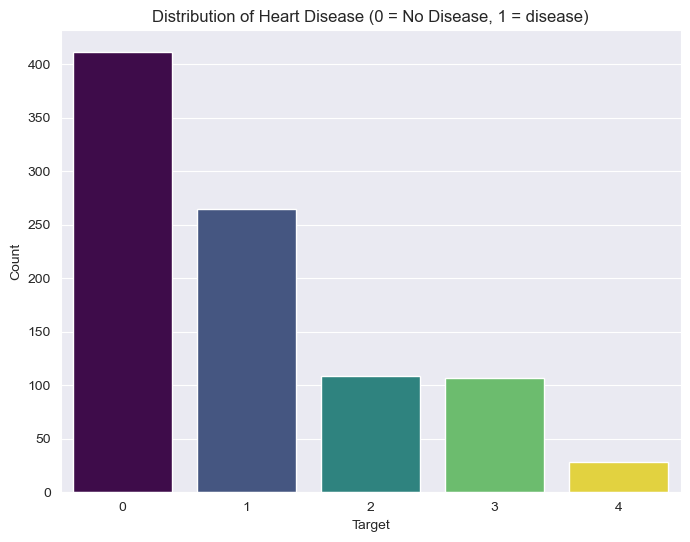

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(heart_df, x="num", palette="viridis", hue="num", legend=False).set_title(
    "Distribution of Heart Disease (0 = No Disease, 1 = disease)"
)
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

### 2.2 Analysing Features vs. Target

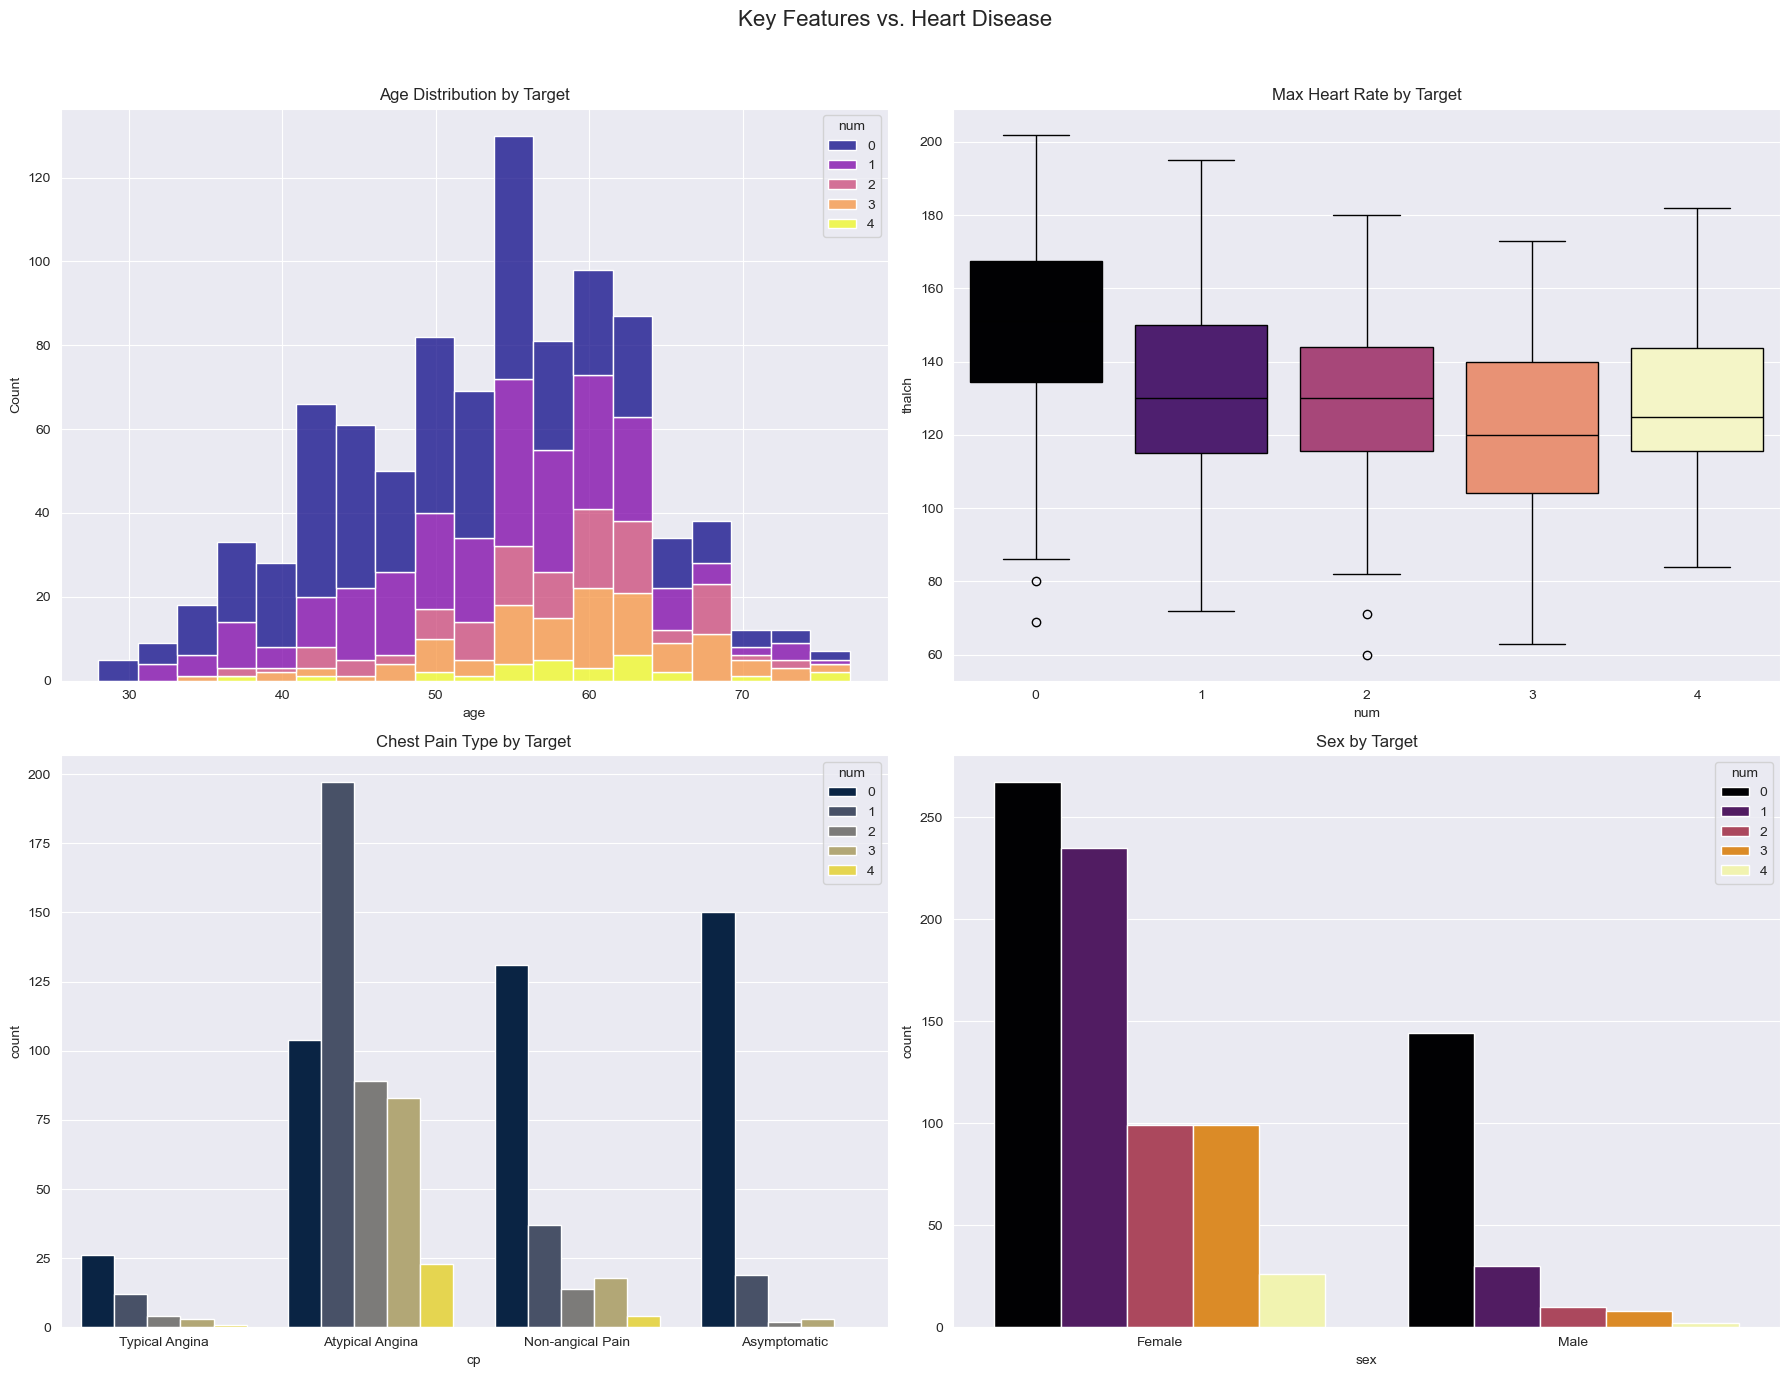

In [7]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("Key Features vs. Heart Disease", fontsize=16)

# Age vs. Target
sns.histplot(
    ax=axes[0, 0], data=heart_df, x="age", hue="num", multiple="stack", palette="plasma"
).set_title("Age Distribution by Target")

# Max Heart Rate vs. Target
sns.boxplot(
    ax=axes[0, 1],
    data=heart_df,
    x="num",
    y="thalch",
    palette="magma",
    hue="num",
    legend=False,
).set_title("Max Heart Rate by Target")

# Chest Pain type vs. Target
cp_plot = sns.countplot(
    ax=axes[1, 0], data=heart_df, x="cp", hue="num", palette="cividis"
)
cp_plot.set_title("Chest Pain Type by Target")
cp_plot.set_xticks(range(len(heart_df["cp"].unique())))
cp_plot.set_xticklabels(
    ["Typical Angina", "Atypical Angina", "Non-angical Pain", "Asymptomatic"]
)

# Sex vs. Target
sex_plot = sns.countplot(
    ax=axes[1, 1], data=heart_df, x="sex", hue="num", palette="inferno"
)
sex_plot.set_title("Sex by Target")
sex_plot.set_xticks(range(len(heart_df["sex"].unique())))
sex_plot.set_xticklabels(["Female", "Male"])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

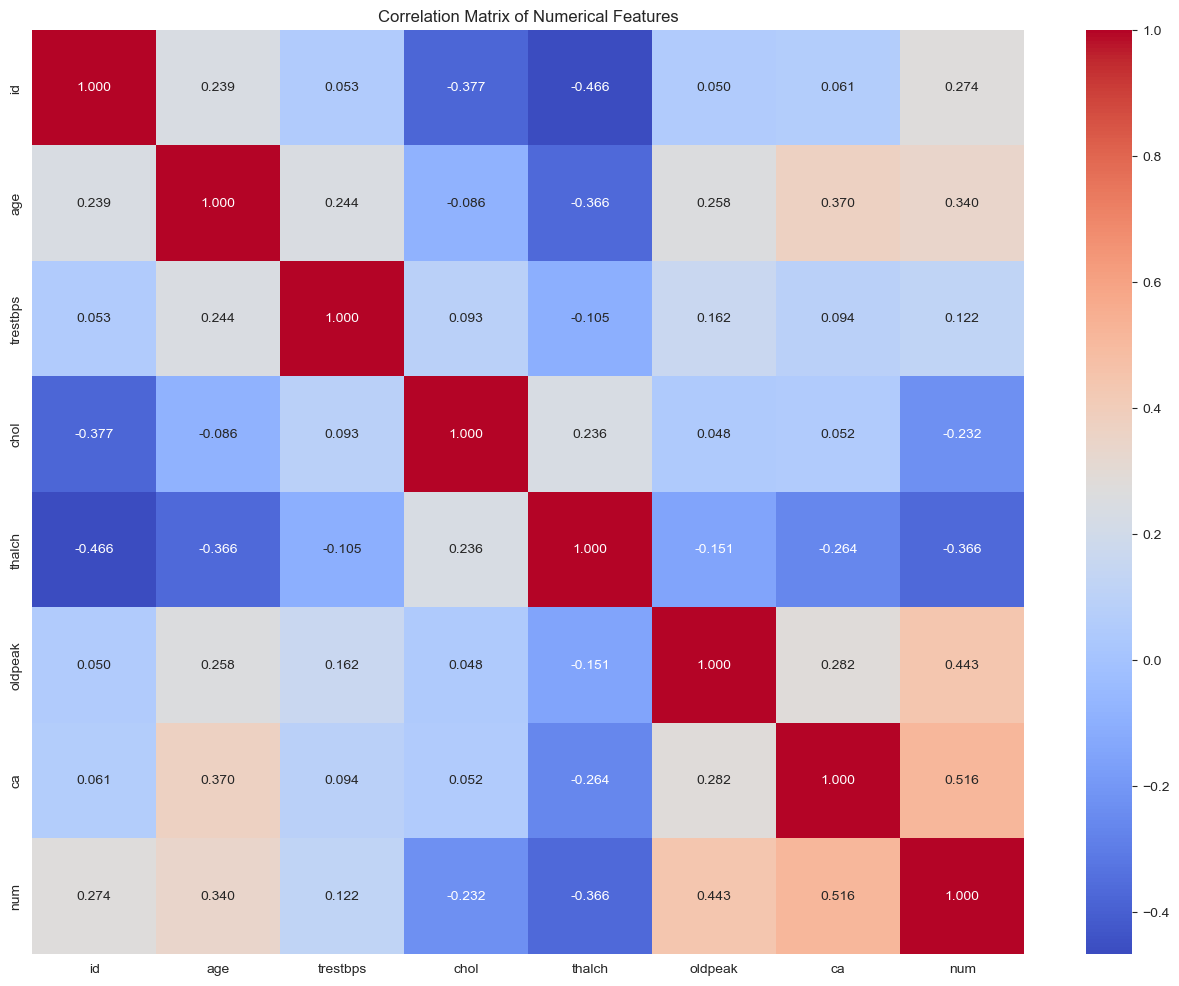

In [8]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = heart_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Step 3: Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = heart_df.drop("num", axis=1)
y = heart_df["num"]

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(["id", "dataset"], axis=1)

# Split data BEFORE preprocessing to maintain DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == "object"]
numerical_features = [col for col in all_features if X_train[col].dtype != "object"]

print("Numerical features: ", numerical_features)
print("Categorical features: ", categorical_features)

# Numerical preprocessing
num_imputer = SimpleImputer(strategy="mean")
num_imputer.fit(X_train[numerical_features])
X_train_num = num_imputer.transform(X_train[numerical_features])
X_test_num = num_imputer.transform(X_test[numerical_features])

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

# Categorical preprocessing
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
encoder.fit(X_train[categorical_features])
X_train_cat = encoder.transform(X_train[categorical_features]).toarray()
X_test_cat = encoder.transform(X_test[categorical_features]).toarray()

# Combine numerical and categorical features
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))

Numerical features:  ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


## Step 4: Model Building & Training

### 4.1 Model 1: Logestic Regression (Baseline)

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_processed, y_train)
y_pred_lr = lr_model.predict(X_test_processed)

### 4.2 Model 2: Random Forest Classifier (Advanced)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)

### 4.3 Model 3: Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_processed, y_train)
y_pred_svm = svm_model.predict(X_test_processed)

### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_processed, y_train)
y_pred_knn = knn_model.predict(X_test_processed)

# Step 5: Model Evaluation

In [14]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)

print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.52      0.55      0.53        53
           2       0.27      0.18      0.22        22
           3       0.15      0.14      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.34      0.35      0.34       184
we

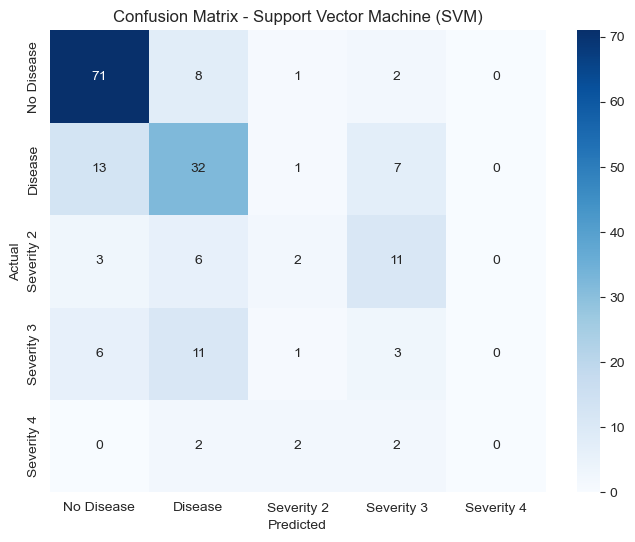

In [15]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease", "Severity 2", "Severity 3", "Severity 4"],
    yticklabels=["No Disease", "Disease", "Severity 2", "Severity 3", "Severity 4"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.show()

## Step 6: Conclusion

This is the submission of the Day-4 project. 
Here we have seen that with or without using `pipeline` the model accuracy doesn't change much. It is as same as with that one which is created using pipeline.

These are some of the ways to improve the accuracy of different models
- We can improve the accuracy by performing feature engineering, for example creating different age-groups etc.
- We can also improve the accuracy of the model used by performing `Hyperparamter tuning`. For example, for SVM model we can use differenct `C`, `gamma` or `kernal` methods
- We can still improve the accuracy by using some other advanced ensemble models like `Gradient Boosting` classifier or `Ada Boosting` classifier, or `XGBoost`